<a href="https://colab.research.google.com/github/evandrofr/visaocomputacional/blob/master/Aula%2009/Visa%CC%83o_Computacional_Aula_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **VISÃO COMPUTACIONAL - AULA 09**

**Objetivos da aula:**

*   revisar a Transformada de Fourier
*   conhecer e praticar com o conceito de deslocamento (shift)
*   conhecer e praticar com o conceito de amlificação de magnitude (shift)
*   conhecer e praticar com o conceito de filtros no domínio da frequencia










**REVISÃO DA TRANSFORMADA DE FOURIER BIDIMENSIONAL**

Imagens também podem ser vistas como sinais, porém especificadas como uma **função bidimensional** f(x,y). Neste caso, a Transformada de Fourier toma uma forma mais complexa, com o uso de duas integrais.

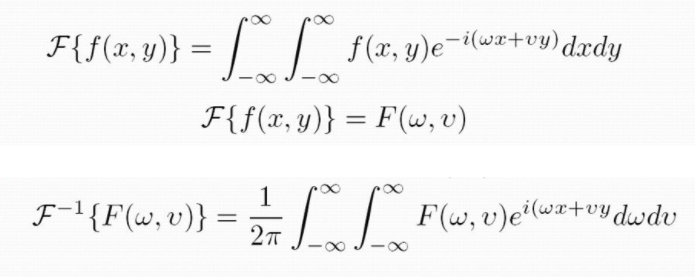

In [1]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

img = cv.imread('fourierbi.png')
cv2_imshow(img)

Podemos calcular esta transformada também usando o submódulo fft do numpy, porém agora usando o método fft2.

(512, 512)


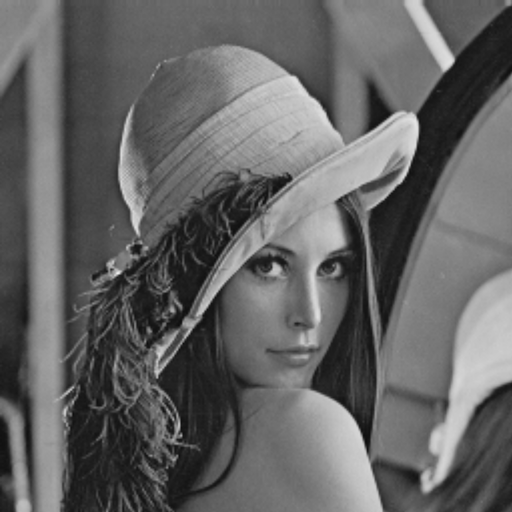

In [2]:
img = cv.cvtColor(cv.imread('lena.png'), cv.COLOR_BGR2GRAY)
print(img.shape)
cv2_imshow(img)

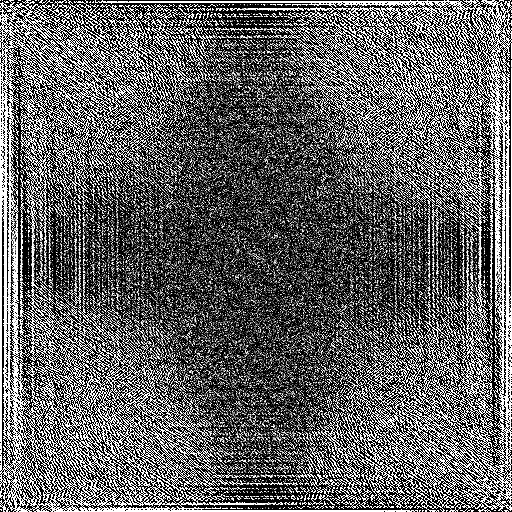

In [3]:
imgf=np.fft.fft2(img)
cv2_imshow(imgf.real)

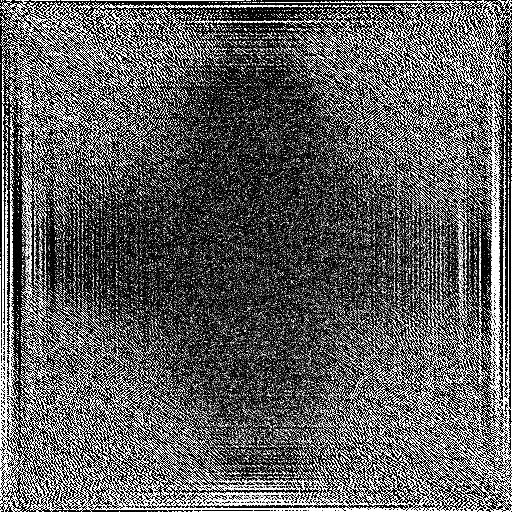

In [4]:
cv2_imshow(imgf.imag)

Para inverter o resultado da transformada bidimensional, usamos o código abaixo:

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


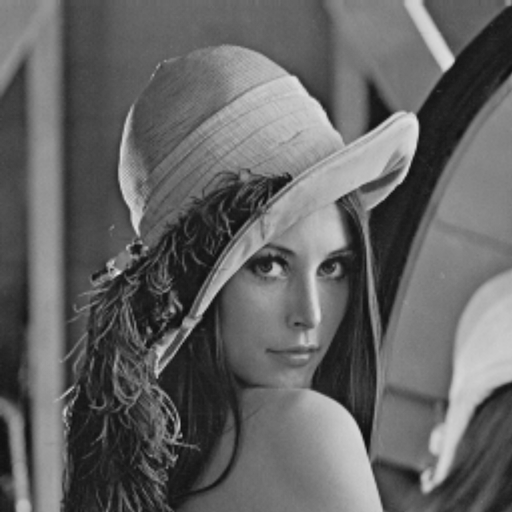

In [5]:
img=np.fft.ifft2(imgf)
cv2_imshow(img)

**DESLOCAMENTO DA TRANSFORMADA E ESPECTRO DE MAGNITUDE**

A componente de frequencia zero está localizada no campo superior esquerdo da transformada. Para tornar mais fácil a alteração da transformada, vamos trazer esta componente para o centro da imagem. Isto é feito com a função abaixo:





/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


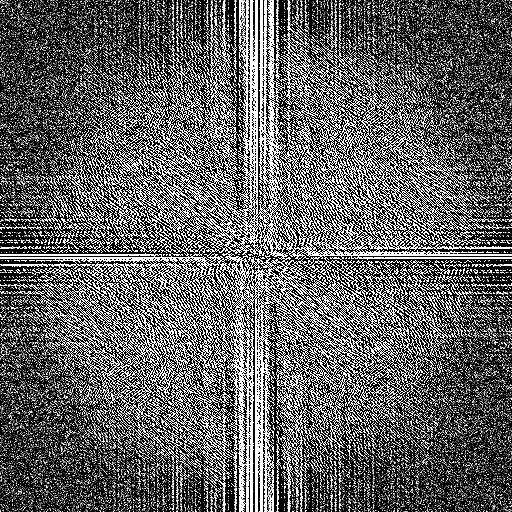

In [6]:
fshift = np.fft.fftshift(imgf)
cv2_imshow(fshift)

O <b>espectro de amplitude (ou magnitude)</b> corresponde aos valores
absolutos dos coeficientes da transformada e podemos usar tanto uma escala linear quanto logarítmica (quando os valores forem elevados). Estes valores ainda podem ser mutiplicados por uma determinado fator (20, no nosso exemplo).



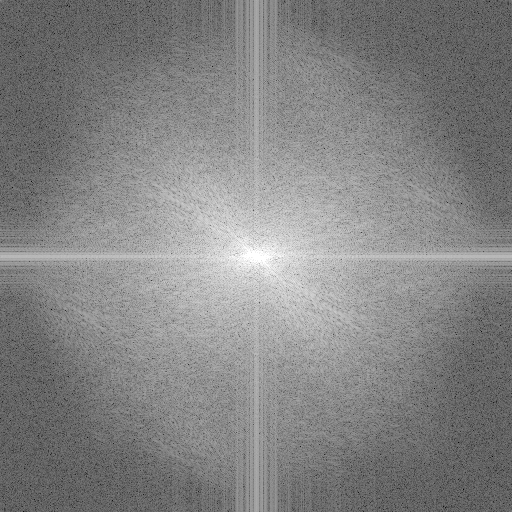

In [7]:
mag_spec = 20*np.log(np.abs(fshift))
cv2_imshow(mag_spec)

O centro do espectro corresponde às <b> frequencias mais baixas</b>, tendo o centro como frequencia mínima (0). À medida que caminhamos para as bordas do espectro, vamos encontrando <b> frequencias mais altas</b>.

Esta observação nos permitirá aplicar filtros específicos de frequencia no espectro e, então, reconstruir a imagem resultante pela Transformada Inversa de Fourier.

**FILTRO PASSA-ALTA**

Um <b>filtro passa-alta (HPF - High Pass Filter)</b> é um filtro que passa sinais com uma frequência mais alta do que uma frequência de corte selecionada. A resposta de frequência exata do filtro depende do projeto do filtro . O filtro, às vezes, é chamado de <b> filtro de corte de graves</b>.

Detecção de arestas (ou bordos) é uma tarefa simples quando trabalhamos no domínio de frequencia com a Transformada de Fourier.

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


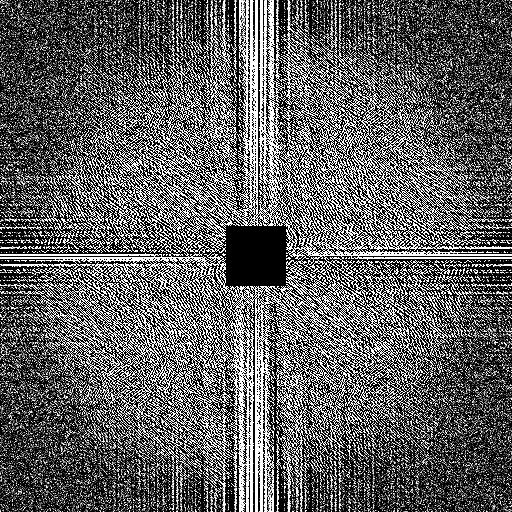

In [8]:
rows, cols = img.shape
crow,ccol = (int)(rows/2) , (int) (cols/2)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
cv2_imshow(fshift)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


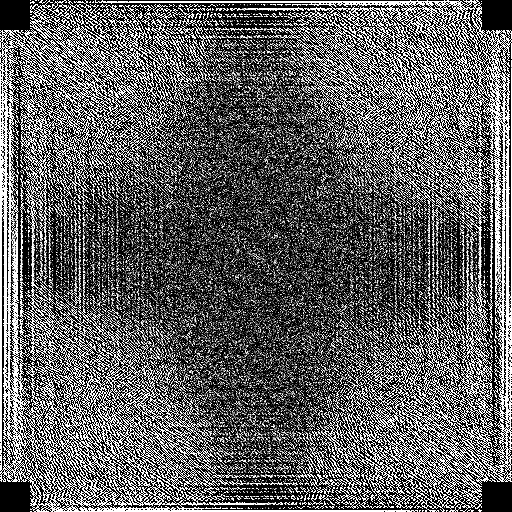

In [9]:
f_ishift = np.fft.ifftshift(fshift)
cv2_imshow(f_ishift)

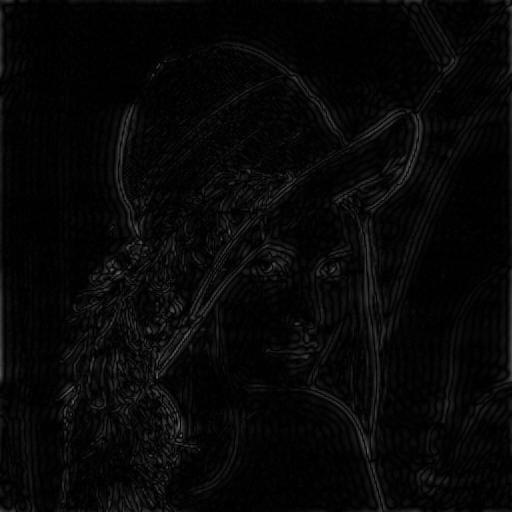

In [10]:
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
cv2_imshow(img_back)

**EXERCÍCIO**

Melhore a qualidade da bordas obtidas pela inversa da Transformada de Fourier.

In [ ]:
#implemente seu código aqui


**EXERCÍCIO**

Na implementação anterior, consideramos uma máscara quadrada com valores todos iguais a zero. Qual seria o resultado da reconstrução se usássemos uma máscara com valores diferentes de zero ?

In [ ]:
#implemente seu código aqui


**EXERCÍCIO**

Na implementação anterior, consideramos uma máscara quadrada para eliminar as frequências baixas. Dado um raio r, modifique esta máscara para que seja circular de raio r. Compare as diferenças na reconstrução com a máscara quadrada.

In [ ]:
#implemente seu código aqui


**FILTRO PASSA-BAIXA**

Um <b>filtro passa-BAIXA (LPF - Low Pass Filter)</b> é um filtro que passa sinais com uma frequência mais baixa do que uma frequência de corte selecionada. A resposta de frequência exata do filtro também depende do projeto do filtro . O filtro, às vezes, é chamado de <b> filtro de corte de agudos</b>.

**EXERCÍCIO**

Implemente um filtro passa-baixa e o aplique na imagem da Transformada de Fourier. Obtenha o resultado e verifique que este filtro produz uma suavização na imagem original.

In [ ]:
#implemente seu código aqui


**FILTRO PASSA-BANDA**

Um <b>filtro passa-BANDA (BPF - Band Pass Filter)</b> é aquele que deixa passar somente frequências dentro de um intervalo. A resposta de frequência exata do filtro também depende do projeto do filtro . 

**EXERCÍCIO**

Implemente um filtro passa-banda e o aplique na imagem da Transformada de Fourier. Obtenha o resultado e discuta qual o efeito real deste filtro.

In [ ]:
#implemente seu código aqui
